# NTS Data




In [1]:
import random

from scipy.stats import norm
import numpy as np
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from pathlib import Path

from caveat.evaluate.describe import features
from caveat.evaluate.features import participation
from caveat.evaluate.describe.times import (
    joint_time_distributions_plot,
    times_distributions_plot,
)
from caveat.evaluate.describe.transitions import sequence_prob_plot
from caveat.evaluate.distance import mape, emd
from caveat.evaluate.features import participation, times

In [2]:
schedules = pd.read_csv(
    "C:/Users/fred/Projects/caveat/tmp/nts_home_schedules.csv"
)
synth_path = Path("C:/Users/fred/Projects/caveat/experiments/vaes2")
kld0 = pd.read_csv(
    synth_path / "VAESeqLSTM_6x6x512_kld0/version_0/synthetic_schedules.csv"
)
kld0001 = pd.read_csv(
    synth_path / "VAESeqLSTM_6x6x512_kld0001/version_0/synthetic_schedules.csv"
)
kld0005 = pd.read_csv(
    synth_path / "VAESeqLSTM_6x6x512_kld0005/version_0/synthetic_schedules.csv"
)
kld001 = pd.read_csv(
    synth_path / "VAESeqLSTM_6x6x512_kld001/version_0/synthetic_schedules.csv"
)
kld005 = pd.read_csv(
    synth_path / "VAESeqLSTM_6x6x512_kld005/version_0/synthetic_schedules.csv"
)
kld01 = pd.read_csv(
    synth_path / "VAESeqLSTM_6x6x512_kld01/version_0/synthetic_schedules.csv"
)
vaes = {
    "kld0": kld0,
    "kld0001": kld0001,
    "kld0005": kld0005,
    "kld001": kld001,
    "kld005": kld005,
    "kld01": kld01,
}

<Axes: >

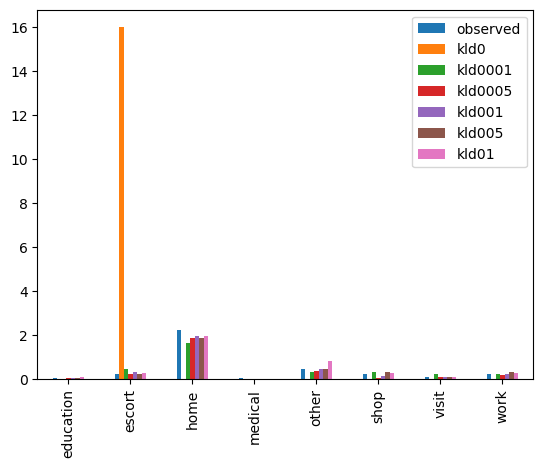

In [3]:
observed = pd.Series(
    features.average(participation.participation_rates_by_act(schedules))
)
rates = {"observed": observed}
diffs = {}
for k, v in vaes.items():
    rate = features.average(participation.participation_rates_by_act(v))
    rates[k] = rate
    diffs[k] = rate - observed

pd.DataFrame(rates).plot(kind="bar")

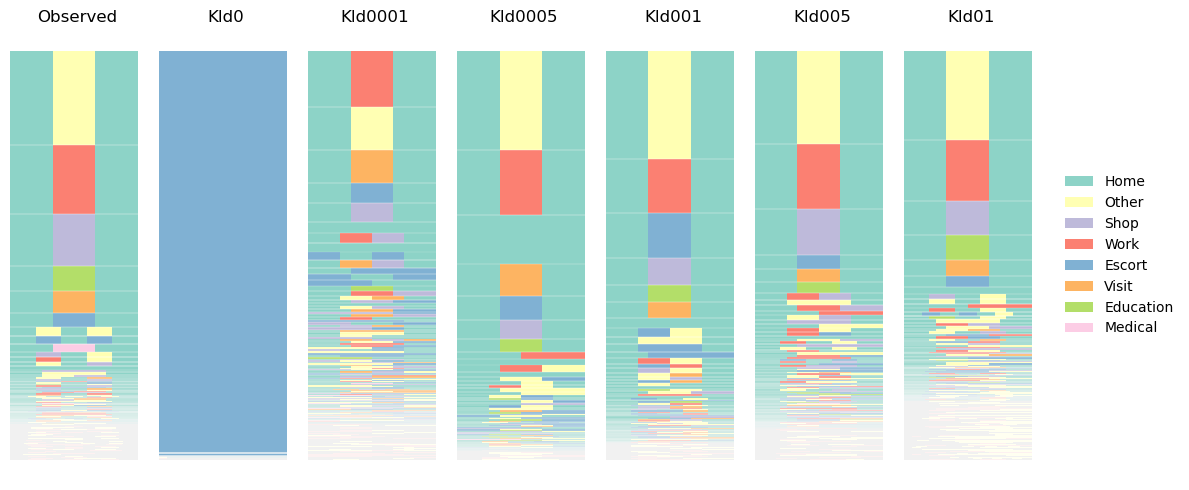

In [4]:
fig = sequence_prob_plot(schedules, vaes)

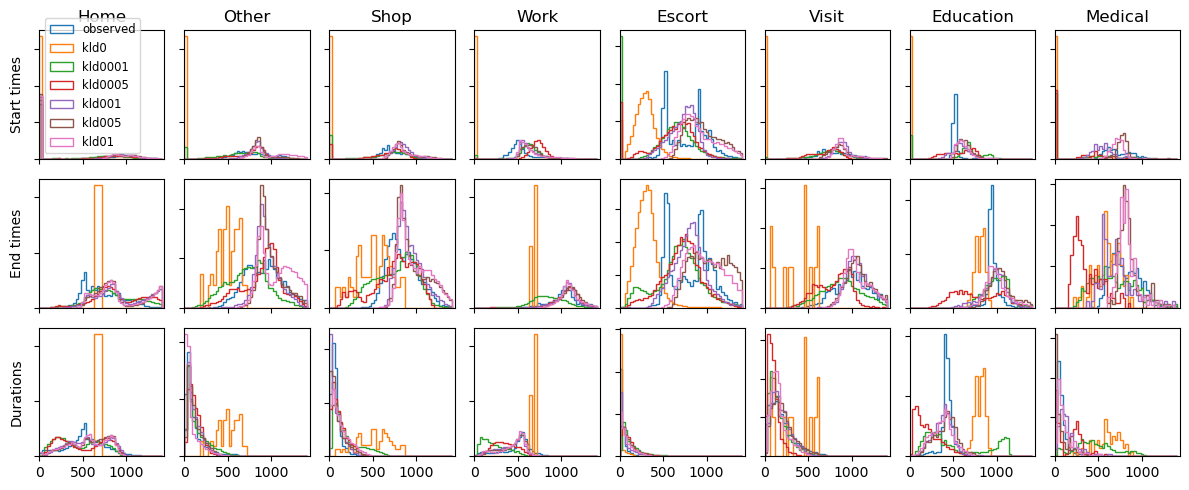

In [5]:
fig = times_distributions_plot(schedules, vaes)

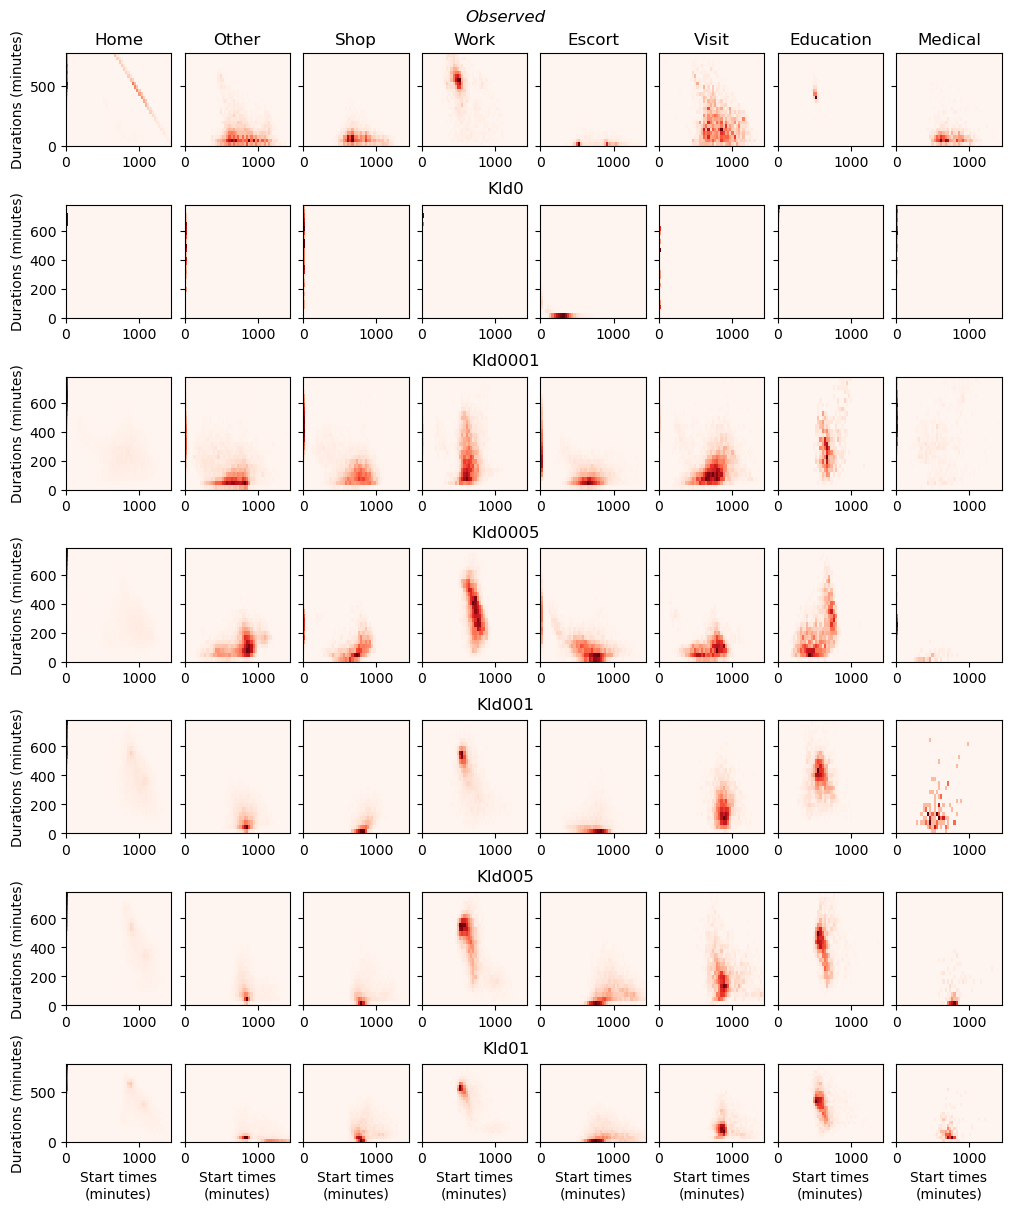

In [6]:
fig = joint_time_distributions_plot(schedules, vaes, figsize=(10, 12))

In [10]:
inferred_zs = {}
for name in ["kld0", "kld0001", "kld0005", "kld001", "kld005", "kld01"]:
    path = synth_path / f"VAESeqLSTM_6x6x512_{name}/version_0/test_inference"
    inferred_z = pd.read_csv(path / "zs.csv", header=None)
    inferred_zs[name] = inferred_z
    print(name, len(inferred_z))


kld0 3730
kld0001 3730
kld0005 3730
kld001 3730
kld005 3730
kld01 3730


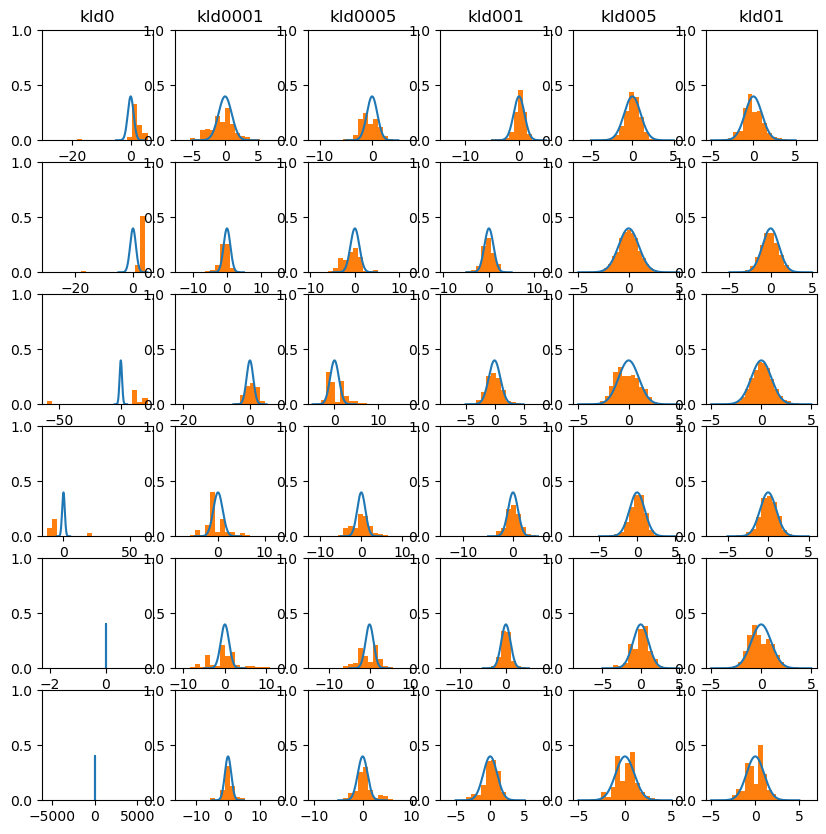

In [12]:
x_axis = np.arange(-5, 5, 0.01)
n = norm.pdf(x_axis, 0, 1)

fig, axs = plt.subplots(6, 6, figsize=(10, 10), sharey=False, sharex=False)
for c, (name, data) in enumerate(inferred_zs.items()):
    axs[0, c].set_title(name)
    for i in range(6):
        if i < len(data.columns):
            axs[i, c].plot(x_axis, n)
            axs[i, c].hist(data.iloc[:, i], bins=20, density=True)
            axs[i, c].set_ylim((0, 1))

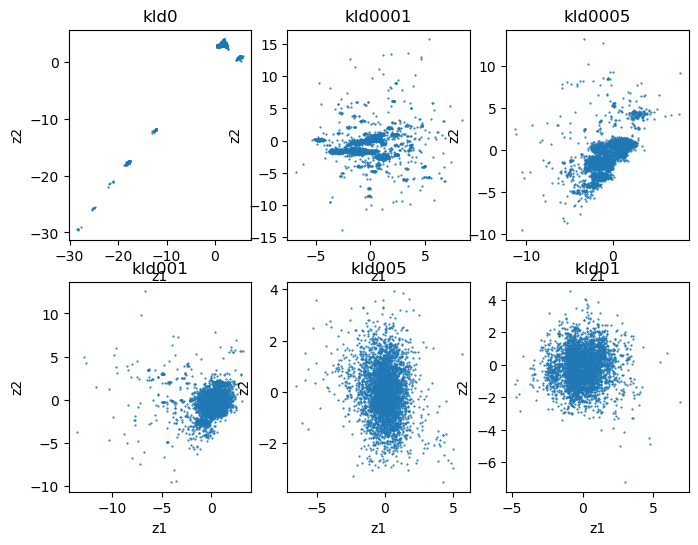

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(8, 6))
for ax, (name, data) in zip(axs.flatten(), inferred_zs.items()):
    ax.set_title(name)
    ax.set_xlabel("z1")
    ax.set_ylabel("z2")
    ax.scatter(data.loc[:, 0], data.loc[:, 1], alpha=1, s=0.3)

In [ ]:
for name, data in zs.items():
    print(f"{name}: {(data.corr().sum().sum()-6)/2}")

zs["kld0005"].corr()

kld0: -0.8114565475287532
kld0001: -0.43315768364682405
kld0005: -0.17105576051378568
kld001: 0.36461383614089193
kld005: 0.05973436978290714
kld01: -0.04180847458938608


,0,1,2,3,4,5
0,1.000000,0.051937,0.227335,0.115528,0.053783,-0.358102
1,0.051937,1.000000,-0.226509,0.030189,0.282511,0.059568
2,0.227335,-0.226509,1.000000,-0.133168,-0.154918,-0.214855
3,0.115528,0.030189,-0.133168,1.000000,0.277501,-0.050150
4,0.053783,0.282511,-0.154918,0.277501,1.000000,-0.131704
5,-0.358102,0.059568,-0.214855,-0.050150,-0.131704,1.000000


In [ ]:
observed_work_status["unemployed"].act.value_counts()

act
home         37145
other         8993
shop          4938
escort        3520
visit         2442
education     2360
medical        935
work            70
Name: count, dtype: int64

In [ ]:
kld1_work_status["unemployed"].act.value_counts()

act
home         29140
escort        8850
other         5629
work          2109
education     1402
shop          1388
visit          827
medical        143
Name: count, dtype: int64

In [ ]:
def split(attributes, schedules):
    splits = {}
    splits["gender"] = filter_on(attributes, schedules, "gender")
    splits["age"] = filter_on(attributes, schedules, "age_group")
    splits["age"] = {
        i: splits["age"][i] for i in ["senior", "adult", "young adult", "child"]
    }
    splits["ethnicity"] = filter_on(attributes, schedules, "ethnicity")
    splits["education"] = filter_on(attributes, schedules, "education")
    splits["license"] = filter_on(attributes, schedules, "license")
    splits["car_access"] = filter_on(attributes, schedules, "car_access")
    splits["work"] = filter_on(attributes, schedules, "work_status")
    splits["area"] = filter_on(attributes, schedules, "area")
    splits["income"] = filter_on(attributes, schedules, "income_group")
    splits["income"] = {
        i: splits["income"][i]
        for i in ["highest", "high", "medium", "low", "lowest"]
    }
    splits["hh"] = filter_on(attributes, schedules, "hh_composition")
    splits["children"] = filter_on(attributes, schedules, "hh_children")
    splits["children"] = {
        i: splits["children"][i] for i in ["0", "1", "2", "3+"]
    }
    return splits


observed_splits = split(attributes, schedules)
cvae_splits = split(attributes, cvae)
vae_splits = split(attributes, vae)
rnn_splits = split(attributes, rnn)
kld0_splits = split(attributes, kld0)
kld1_splits = split(attributes, kld1)
kld100_splits = split(attributes, kld100)

In [ ]:
build_table(
    schedules,
    [
        gender_filtered,
        age_filtered,
        education_filtered,
        work_filtered,
        license_filtered,
        area_filtered,
        income_filtered,
    ],
    #   car_access_filtered, work_filtered, area_filtered, income_filtered],
    lambda x: features.average(times.start_times_by_act(x)),
)

In [ ]:
build_table(
    schedules,
    [
        gender_filtered,
        age_filtered,
        education_filtered,
        license_filtered,
        area_filtered,
        income_filtered,
    ],
    lambda x: features.sd(times.start_times_by_act(x)),
)

In [ ]:
fig = times_distributions_plot(schedules, work_filtered)

acts:  ['home', 'shop']
dict_keys(['obs', 'kld0', 'kld1'])


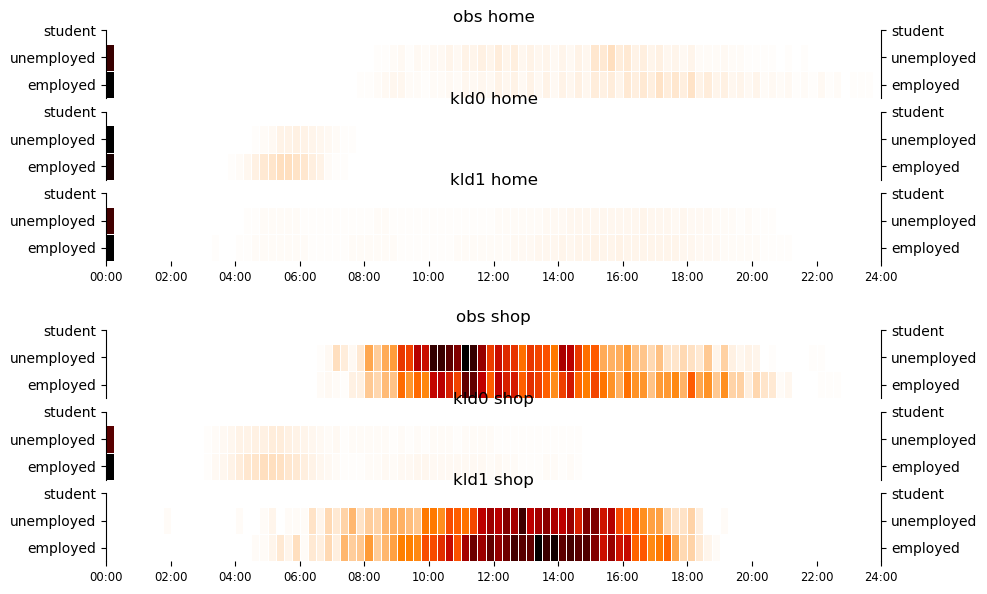

In [ ]:
def plot_times(
    subs,
    column="start",
    acts=None,
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
):
    if acts is None:
        acts = set()
        for data in subs.values():
            acts.update(set(data.act))

    print("acts: ", acts)

    splits = {
        k: extract_activities(v, column, minimum, maximum)
        for k, v in subs.items()
    }
    print(splits.keys())

    return plot_bins(
        splits,
        acts,
        column,
        normalise=normalise,
        minimum=minimum,
        maximum=maximum,
        width=plot_width,
    )


def extract_activities(schedules, column, minimum, maximum):
    if schedules.empty:
        return pd.DataFrame()
    data = schedules.copy()
    if minimum is not None:
        data = data[data[column] >= minimum]
    if maximum is not None:
        data = data[data[column] <= maximum]
    return pd.DataFrame(
        {
            "act": data.act,
            "start": (data.start).astype(int),
            "end": (data.end).astype(int),
            "duration": (data.duration).astype(int),
        }
    )


def plot_bins(
    splits,
    acts,
    column,
    width=10,
    height_factor=1.2,
    normalise=False,
    minimum=0,
    maximum=1440,
):
    fig, axs = plt.subplots(
        len(acts),
        figsize=(width, len(acts) * (len(splits) + 1) / 4),
        sharex=False,
    )
    if not isinstance(axs, np.ndarray):
        axs = [axs]

    mmhours = int(minimum / 60)
    mxhours = int(maximum / 60)
    duration = mxhours - mmhours
    step = 2

    for ax, act in zip(axs, acts):
        keys = list(splits.keys())
        n_keys = len(keys)
        binned = time_binner(splits, act, column, minimum, maximum)
        if normalise:
            binned = binned / binned.max()
        ax.pcolormesh(
            binned.T, cmap="gist_heat_r", edgecolors="white", linewidth=0.5
        )
        ax.xaxis.set_ticks([i for i in range(0, duration * 4 + 1, 8)])
        ax.set_xticklabels(
            [f"{h:02}:00" for h in range(mmhours, mxhours + 1, step)],
            size="small",
        )
        ax.yaxis.set_ticks([i + 0.5 for i in range(n_keys)])
        ax.yaxis.set_ticklabels(keys)
        ax.grid(which="minor", color="w", linestyle="-", linewidth=2)
        ax.tick_params(right=True, labelright=True)
        for pos in ["top", "bottom"]:
            ax.spines[pos].set_visible(False)
        ax.set_title(act.title(), fontsize="medium", rotation=0)

    fig.tight_layout()
    return fig


def time_binner(splits, act, column, minimum, maximum):
    """Bin start and end times and durations, return freq table for X hour period, 15min intervals."""
    bins = list(range(minimum, maximum + 1, 15))
    # bins[-1] = 100 * 60
    start = f"{int(minimum/60):02}:00:00"
    periods = int((maximum - minimum) / 15)
    labels = pd.timedelta_range(start=start, periods=periods, freq="15min")
    binned = pd.DataFrame(
        index=pd.timedelta_range(start=start, periods=periods, freq="15min")
    )
    for key, data in splits.items():
        if data.empty:
            continue
        split = data[data.act == act]
        if len(split) == 0:
            continue
        binned[key] = pd.cut(
            split[column], bins, labels=labels, right=False
        ).value_counts()

    return binned


def plot_times_compare(
    splits,
    column="start",
    acts=None,
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
):
    if acts is None:
        acts = set()
        for k, split in splits.items():
            for i, data in split.items():
                if data.empty:
                    continue
                acts.update(set(data.act))

    print("acts: ", acts)

    processed_splits = {}
    for name, split in splits.items():
        processed_splits[name] = {
            k: extract_activities(v, column, minimum, maximum)
            for k, v in split.items()
        }
    print(splits.keys())

    return plot_bins_compare(
        splits,
        acts,
        column,
        normalise=normalise,
        minimum=minimum,
        maximum=maximum,
        width=plot_width,
    )


def plot_bins_compare(
    splits,
    acts,
    column,
    width=10,
    height_factor=1.2,
    normalise=False,
    minimum=0,
    maximum=1440,
):
    fig = plt.figure(
        # constrained_layout=True,
        figsize=(width, len(acts) * (len(splits) + 1) * len(splits) / 4)
    )

    subfigs = fig.subfigures(len(acts), 1)
    mmhours = int(minimum / 60)
    mxhours = int(maximum / 60)
    duration = mxhours - mmhours
    step = 2

    for act, subfig in zip(acts, subfigs.flat):
        # subfig.suptitle(f'Subfig {outerind}')
        axs = subfig.subplots(len(splits), 1)
        for name, split, ax in zip(splits.keys(), splits.values(), axs.flat):
            ax.set_title(f"{name} {act}")
            keys = list(split.keys())
            n_keys = len(keys)
            binned = time_binner(split, act, column, minimum, maximum)
            if normalise:
                binned = binned / binned.max()
            ax.pcolormesh(
                binned.T, cmap="gist_heat_r", edgecolors="white", linewidth=0.5
            )
            ax.set_xticks([])
            ax.yaxis.set_ticks([i + 0.5 for i in range(n_keys)])
            ax.yaxis.set_ticklabels(keys)
            ax.grid(which="minor", color="w", linestyle="-", linewidth=2)
            ax.tick_params(right=True, labelright=True)
            for pos in ["top", "bottom"]:
                ax.spines[pos].set_visible(False)
            # ax.set_title(act.title(), fontsize="medium", rotation=0)
        ax.xaxis.set_ticks([i for i in range(0, duration * 4 + 1, 8)])
        ax.set_xticklabels(
            [f"{h:02}:00" for h in range(mmhours, mxhours + 1, step)],
            size="small",
        )

    # fig.tight_layout()
    return fig


fig = plot_times_compare(
    splits={
        "obs": observed_splits["work"],
        "kld0": kld0_splits["work"],
        "kld1": kld1_splits["work"],
    },
    acts=["home", "shop"],
    column="start",
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
)

acts:  {'work', 'education', 'other', 'visit', 'medical', 'home', 'shop', 'escort'}
dict_keys(['obs', 'KLD1', 'KLD100', 'KLD10000'])


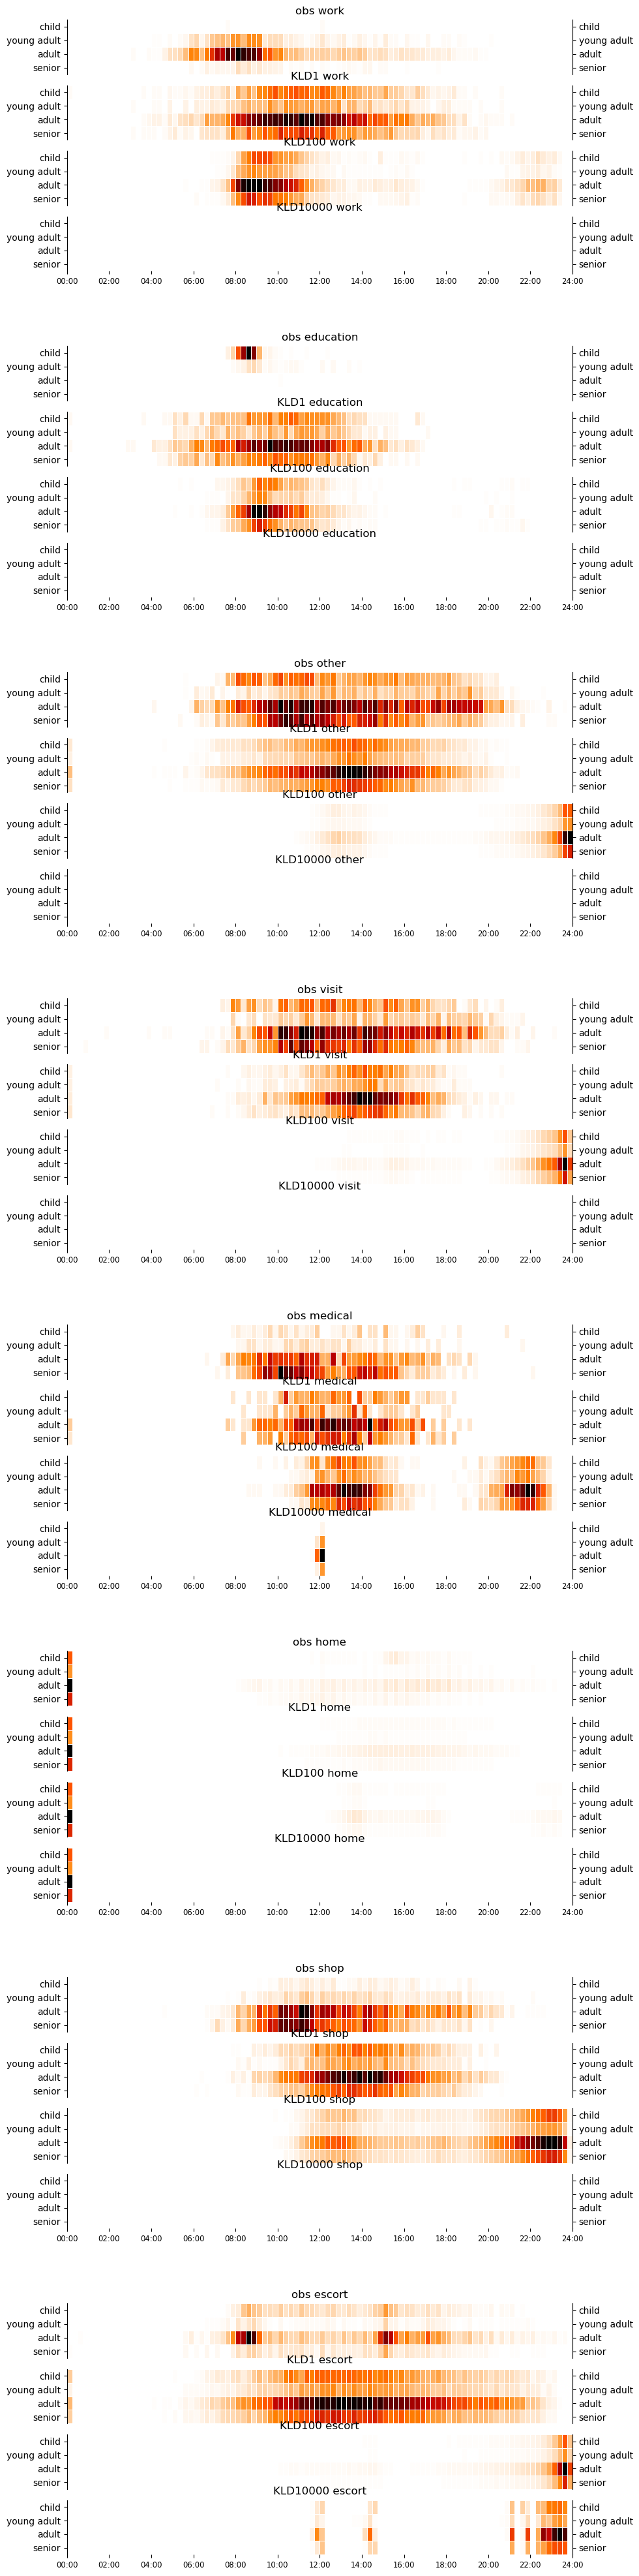

In [ ]:
fig = plot_times_compare(
    splits={
        "obs": observed_splits["age"],
        "KLD1": KLD1_splits["age"],
        "KLD100": KLD100_splits["age"],
        "KLD10000": KLD10000_splits["age"],
    },
    column="start",
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
)

In [ ]:
fig = plot_times(
    observed_splits["work"],
    column="start",
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
)

In [ ]:
fig = plot_times(
    children_filtered,
    column="start",
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
)

In [ ]:
op = lambda x: features.average(participation.participation_rates_by_act(x))

build_table(
    schedules,
    [
        gender_filtered,
        age_filtered,
        education_filtered,
        license_filtered,
        area_filtered,
        income_filtered,
    ],
    op,
)

In [ ]:
fig = sequence_prob_plot(schedules, observed_splits["age"], figsize=(12, 4))

In [ ]:
fig = sequence_prob_plot(cvae, cvae_splits["work"], figsize=(12, 4))

In [ ]:
fig = sequence_prob_plot(schedules, education_filtered, figsize=(12, 4))

In [ ]:
fig = sequence_prob_plot(schedules, income_filtered, figsize=(12, 4))

In [ ]:
fig = sequence_prob_plot(schedules, area_filtered, figsize=(12, 4))

In [ ]:
fig = joint_time_distributions_plot(schedules, gender_filtered, figsize=(10, 6))

In [ ]:
fig = joint_time_distributions_plot(schedules, age_filtered, figsize=(10, 8))